## data importation


In [35]:
import gc
gc.collect()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



44746

In [36]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('output.csv')

#df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## EDA

In [37]:
# Checking data types of each column
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Attrition_Flag              object
Gender                      object
Education_Level             object
Marital_Status              object
Card_Category               object
Verification_Status         object
Loan_Title                  object
start_date                  object
end_date                    object
bank_name                   object
TransactionDate             object
Client_REF                  object
Credit_Card_REF             object
RefundF_REF                 object
Point_RewardF_REF           object
Fraud_DetectionF_REF        object
Spending_Categ_REF          object
Location_REF                object
Loan_Amount                float64
Funded_Amount              float64
Term                       float64
Interest_Rate               object
Verification_Status.1       object
Loan_Title.1                object
CustomerREF                 object
Term_Year                  float64
StartDate                   object
EndDate                     object
RefundTypeREF       

In [38]:
# Summarizing the statistical properties of the dataset
df.describe(include='all')

# Identifying missing values in the dataset
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Attrition_Flag              0
Gender                      0
Education_Level             0
Marital_Status              0
Card_Category               0
Verification_Status         0
Loan_Title                  0
start_date                  0
end_date                    0
bank_name                   3
TransactionDate             0
Client_REF                  0
Credit_Card_REF             0
RefundF_REF                 0
Point_RewardF_REF           0
Fraud_DetectionF_REF        0
Spending_Categ_REF          0
Location_REF                0
Loan_Amount                 0
Funded_Amount               0
Term                        0
Interest_Rate               0
Verification_Status.1       0
Loan_Title.1                0
CustomerREF                 0
Term_Year                   0
StartDate                   0
EndDate                     0
RefundTypeREF               0
RefundFREF                  0
CustomerREF.1               0
CustomerDOB                33
CustLocation                1
CustAccoun

## Data Preprocessing

In [39]:

import numpy as np

# Handling NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinities with NaN
df.dropna(inplace=True) # Drop rows with NaN values

# Checking the shape of the dataset after preprocessing
print('Dataset shape:', df.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Dataset shape: (9186, 37)


### PCA

## MODELING

###Aprioriiiiiiiiiiii

In [40]:

try:
    import apyori
except:
    !pip install apyori

from apyori import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
# Select a subset of categorical columns for one-hot encoding
subset_columns = ['Card_Category',	'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Verification_Status', 'CustAccountBalance','TransactionTime']

# Perform one-hot encoding
df_onehot1 = (df[subset_columns])

# Show the rows of the one-hot encoded DataFrame



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
moyenne_colonne=df_onehot1['CustAccountBalance'].mean()

moyenne_colonne

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



129761.61392227303

In [43]:
# Spécifiez les limites pour chaque catégorie
min_colonne=df_onehot1['CustAccountBalance'].min()
bins = [-float('inf'),min_colonne, moyenne_colonne, float('inf')]  # Remplacez les valeurs limites selon vos critères


labels = ['lowBalance', 'mediumBalance', 'highBalance']


df_onehot1['CustAccountBalance_Category'] = pd.cut(df_onehot1['CustAccountBalance'], bins=bins, labels=labels, right=False)



df_onehot1.drop(columns=['CustAccountBalance'], inplace=True)

moyenne_colonne2=df_onehot1['TransactionTime'].mean()
min_colonne2=df_onehot1['TransactionTime'].min()
bins = [-float('inf'),min_colonne2, moyenne_colonne2, float('inf')]

# Étiquettes pour chaque catégorie
labels = ['lowTrTime', 'mediumTrTime', 'highTrTime']


df_onehot1['TransactionTime_Category'] = pd.cut(df_onehot1['TransactionTime'], bins=bins, labels=labels, right=False)

df_onehot1.drop(columns=['TransactionTime'], inplace=True)
data=df_onehot1
data.head(50)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-43-253c9085eba0>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-253c9085eba0>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-253c9085eba0>:23: SettingWithCopyWarning:


A value is tryin

Card_Category     Attrition_Flag Gender Education_Level Marital_Status  \
0           Gold  Existing Customer      M     High School        Married   
1       Platinum  Existing Customer      F        Graduate         Single   
2         Silver  Existing Customer      M        Graduate        Married   
3      Signature  Existing Customer      F     High School        Unknown   
4         Silver  Existing Customer      M      Uneducated        Married   
5         Silver  Existing Customer      M        Graduate        Married   
6           Gold  Existing Customer      M         Unknown        Married   
7       Platinum  Existing Customer      M     High School        Unknown   
8         Silver  Existing Customer      M      Uneducated         Single   
9       Platinum  Existing Customer      M        Graduate         Single   
10        Silver  Existing Customer      M      Uneducated        Unknown   
11     Signature  Existing Customer      M         Unknown        Married   
12          Gold  Existing Customer      M         College         Single   
13     Signature  Existing Customer      M        Graduate        Unknown   
14        Silver  Existing Customer      F        Graduate        Married   
15      Platinum  Existing Customer      M         Unknown        Unknown   
16     Signature  Existing Customer      M   Post-Graduate         Single   
17          Gold  Existing Customer      M         Unknown        Married   
18      Platinum  Existing Customer      M     High School        Married   
19        Silver  Existing Customer      M       Doctorate       Divorced   
20     Signature  Existing Customer      M     High School        Married   
21     Signature  Existing Customer      F         Unknown         Single   
22        Silver  Existing Customer      M         Unknown        Married   
23          Gold  Existing Customer      F        Graduate         Single   
24          Gold  Existing Customer      M     High School        Unknown   
25        Silver  Existing Customer      M         Unknown        Married   
26      Platinum  Existing Customer      F      Uneducated         Single   
27     Signature  Existing Customer      M     High School        Married   
28      Platinum  Existing Customer      M         Unknown        Married   
30     Signature  Existing Customer      F         College        Married   
31          Gold  Existing Customer      M        Graduate        Married   
32      Platinum  Existing Customer      F         College         Single   
33          Gold  Existing Customer      F        Graduate        Married   
34     Signature  Existing Customer      F     High School        Married   
35      Platinum  Existing Customer      F        Graduate        Unknown   
36     Signature  Attrited Customer      F       Doctorate        Married   
37        Silver  Existing Customer      M        Graduate         Single   
38        Silver  Existing Customer      M         Unknown        Married   
39        Silver  Existing Customer      F         College         Single   
40      Platinum  Existing Customer      M     High School        Married   
41          Gold  Existing Customer      F        Graduate         Single   
42      Platinum  Existing Customer      M      Uneducated         Single   
43        Silver  Existing Customer      M       Doctorate        Married   
44      Platinum  Existing Customer      M       Doctorate        Married   
45          Gold  Existing Customer      M     High School        Married   
46          Gold  Existing Customer      M         College         Single   
47      Platinum  Existing Customer      F         Unknown        Married   
48          Gold  Attrited Customer      F        Graduate        Married   
49     Signature  Existing Customer      F     High School        Married   
50     Signature  Existing Customer      M         Unknown        Married   

   Verification_Status CustAccountBalance_Category TransactionTime_Category

In [44]:
data.dropna()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Card_Category     Attrition_Flag Gender Education_Level Marital_Status  \
0             Gold  Existing Customer      M     High School        Married   
1         Platinum  Existing Customer      F        Graduate         Single   
2           Silver  Existing Customer      M        Graduate        Married   
3        Signature  Existing Customer      F     High School        Unknown   
4           Silver  Existing Customer      M      Uneducated        Married   
...            ...                ...    ...             ...            ...   
9231        Silver  Existing Customer      M        Graduate         Single   
9232        Silver  Attrited Customer      M         Unknown       Divorced   
9233          Gold  Attrited Customer      F     High School        Married   
9234     Signature  Attrited Customer      M        Graduate        Unknown   
9235      Platinum  Attrited Customer      F        Graduate        Married   

     Verification_Status CustAccountBalance_Category TransactionTime_Category  
0        Source Verified               mediumBalance             mediumTrTime  
1        Source Verified               mediumBalance             mediumTrTime  
2        Source Verified               mediumBalance             mediumTrTime  
3               Verified                 highBalance             mediumTrTime  
4               Verified               mediumBalance               highTrTime  
...                  ...                         ...                      ...  
9231     Source Verified               mediumBalance               highTrTime  
9232        Not Verified               mediumBalance               highTrTime  
9233     Source Verified               mediumBalance               highTrTime  
9234     Source Verified                 highBalance               highTrTime  
9235     Source Verified                 highBalance             mediumTrTime  

[9186 rows x 8 columns]

In [45]:
records=[]
for i in range(0, len(data)):
    records.append([str(data.values[i, j]) for j in range(0, 8)])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
columns1=data.columns
columns1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Card_Category', 'Attrition_Flag', 'Gender', 'Education_Level',
       'Marital_Status', 'Verification_Status', 'CustAccountBalance_Category',
       'TransactionTime_Category'],
      dtype='object')

### Applying the Apriori Algorithm

In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Assuming 'records' is a list of lists representing your dataset
df_records = pd.DataFrame(records)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_records, prefix='', prefix_sep='')

# Convert the one-hot encoded DataFrame to boolean
df_encoded = df_encoded.astype(bool)

# Apply the apriori algorithm
#0.21 behiiii
frequent_itemsets_plus = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Convert the result to a DataFrame and sort it
frequent_itemsets_plus_df = pd.DataFrame(frequent_itemsets_plus)
frequent_itemsets_plus_df = frequent_itemsets_plus_df.sort_values('support', ascending=False).reset_index(drop=True)

# Add a column for the length of itemsets
dd=frequent_itemsets_plus_df['length'] = frequent_itemsets_plus_df['itemsets'].apply(lambda x: len(x))
df_encoded
frequent_itemsets_plus_df






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



support                                           itemsets  length
0     0.847376                                    (mediumBalance)       1
1     0.839647                                (Existing Customer)       1
2     0.709340                 (mediumBalance, Existing Customer)       2
3     0.575005                                       (highTrTime)       1
4     0.531896                                                (F)       1
...        ...                                                ...     ...
5163  0.010015    (M, High School, Single, mediumBalance, Silver)       5
5164  0.010015  (Source Verified, mediumTrTime, Signature, F, ...       5
5165  0.010015  (mediumTrTime, Existing Customer, Not Verified...       5
5166  0.010015     (Existing Customer, Graduate, Gold, Single, F)       5
5167  0.010015  (highBalance, Silver, mediumTrTime, Source Ver...       4

[5168 rows x 3 columns]

Frequently Items

In apriori algorithm, we are able to define the frequent data defined by the given support value
There are 5168 associations that are considered as frequent

meduimBalance ,existing customer are the most frequently items with the support value of 0.847376 and 0.839647
The higher the support, the more likely the prediction will occur.

In [48]:
frequent_itemsets_plus_df[ (frequent_itemsets_plus_df['length'] == 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



support             itemsets  length
0     0.847376      (mediumBalance)       1
1     0.839647  (Existing Customer)       1
3     0.575005         (highTrTime)       1
4     0.531896                  (F)       1
7     0.480623    (Source Verified)       1
8     0.468104                  (M)       1
9     0.460919            (Married)       1
12    0.424995       (mediumTrTime)       1
18    0.392663             (Single)       1
23    0.352602             (Silver)       1
30    0.308840           (Graduate)       1
38    0.275419           (Verified)       1
47    0.243958       (Not Verified)       1
61    0.217831           (Platinum)       1
63    0.215001               (Gold)       1
65    0.214566          (Signature)       1
79    0.198128        (High School)       1
122   0.160353  (Attrited Customer)       1
135   0.152624        (highBalance)       1
138   0.150882            (Unknown)       1
145   0.147616         (Uneducated)       1
274   0.099935            (College)       1
468   0.073264           (Divorced)       1
470   0.073155            (Unknown)       1
806   0.049858      (Post-Graduate)       1
933   0.044742          (Doctorate)       1
4704  0.011104            (Unknown)       1

Frequently 2 items together



In [49]:
frequent_itemsets_plus_df[ (frequent_itemsets_plus_df['length'] == 2)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



support                            itemsets  length
2     0.709340  (mediumBalance, Existing Customer)       2
5     0.490747         (highTrTime, mediumBalance)       2
6     0.489114     (highTrTime, Existing Customer)       2
10    0.449379                  (mediumBalance, F)       2
11    0.439473              (F, Existing Customer)       2
...        ...                                 ...     ...
4733  0.010995               (Uneducated, Unknown)       2
4802  0.010777               (Post-Graduate, Gold)       2
4849  0.010668              (Doctorate, Signature)       2
4870  0.010668           (Platinum, Post-Graduate)       2
5135  0.010015          (Post-Graduate, Signature)       2

[271 rows x 3 columns]

In [50]:
frequent_itemsets_plus_df[ (frequent_itemsets_plus_df['length'] == 5)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



support                                           itemsets  length
238   0.108970  (M, Existing Customer, highTrTime, mediumBalan...       5
254   0.103201  (M, Source Verified, Existing Customer, highTr...       5
272   0.100697  (Existing Customer, highTrTime, F, mediumBalan...       5
288   0.097431  (Source Verified, Existing Customer, highTrTim...       5
295   0.095907  (Source Verified, Existing Customer, highTrTim...       5
...        ...                                                ...     ...
5162  0.010015  (M, Existing Customer, Gold, Unknown, mediumBa...       5
5163  0.010015    (M, High School, Single, mediumBalance, Silver)       5
5164  0.010015  (Source Verified, mediumTrTime, Signature, F, ...       5
5165  0.010015  (mediumTrTime, Existing Customer, Not Verified...       5
5166  0.010015     (Existing Customer, Graduate, Gold, Single, F)       5

[1410 rows x 3 columns]

Finding The Association Between Frequent Items

From association rules, we could extract information and even discover knowledge about which items that is more effective to be together.

In [51]:
#From association rules, we could extract information and even discover knowledge about which items that is more effective to be together.
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_plus_df, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0    (mediumBalance, Single, Source Verified, Silver)   
1                                           (Unknown)   
2                                           (Unknown)   
3   (Existing Customer, highTrTime, Single, Silver...   
4         (highTrTime, Single, mediumBalance, Silver)   
5                                           (Unknown)   
6                  (mediumBalance, Single, F, Silver)   
7                                           (Unknown)   
8                                           (Unknown)   
9     (highTrTime, Single, Existing Customer, Silver)   
10                    (Single, Silver, mediumBalance)   
11                                          (Unknown)   
12                                          (Unknown)   
13                       (highTrTime, Single, Silver)   
14  (mediumBalance, Silver, Source Verified, mediu...   
15                                          (Unknown)   
16                  (Single, Silver, Source Verified)   
17                                          (Unknown)   
18                                          (Unknown)   
19                                (M, Single, Silver)   
20  (Silver, Single, mediumBalance, Existing Custo...   
21                                          (Unknown)   
22           (F, mediumBalance, Silver, mediumTrTime)   
23                                          (Unknown)   
24                                          (Unknown)   
25                                   (Single, Silver)   
26                (Single, Silver, Existing Customer)   
27                                          (Unknown)   
28                                          (Unknown)   
29       (highTrTime, mediumBalance, F, Not Verified)   
30              (Silver, mediumBalance, mediumTrTime)   
31                                          (Unknown)   
32                                          (Unknown)   
33                                (Single, Silver, F)   
34              (Silver, mediumBalance, Not Verified)   
35                                          (Unknown)   
36                                          (Unknown)   
37           (F, mediumBalance, Single, mediumTrTime)   
38  (Silver, mediumBalance, Not Verified, Existing...   
39                                          (Unknown)   
40                                          (Unknown)   
41            (Silver, mediumTrTime, Source Verified)   
42                            (M, highTrTime, Single)   
43                                          (Unknown)   
44  (Silver, mediumBalance, mediumTrTime, Existing...   
45                                          (Unknown)   
46                          (Single, F, mediumTrTime)   
47                                          (Unknown)   
48                                          (Unknown)   
49                         (M, Married, mediumTrTime)   

                                          consequents  antecedent support  \
0                                           (Unknown)            0.053777   
1    (mediumBalance, Single, Source Verified, Silver)            0.011104   
2   (Existing Customer, highTrTime, Single, Silver...            0.011104   
3                                           (Unknown)            0.052362   
4                                           (Unknown)            0.062813   
5         (highTrTime, Single, mediumBalance, Silver)            0.011104   
6                                           (Unknown)            0.060745   
7                  (mediumBalance, Single, F, Silver)            0.011104   
8     (highTrTime, Single, Existing Customer, Silver)            0.011104   
9                                           (Unknown)            0.059874   
10                                          (Unknown)            0.108861   
11                    (Single, Silver, mediumBalance)            0.011104   
12                       (highTrTime, Single, Silver)            0.011104   
13                                          (Unknown)   

3D Scatter Plot of rules

Association rules are plotted in a 3D scatter plot.
Rules that are closer to top right are the rules that can be the most meaningful

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



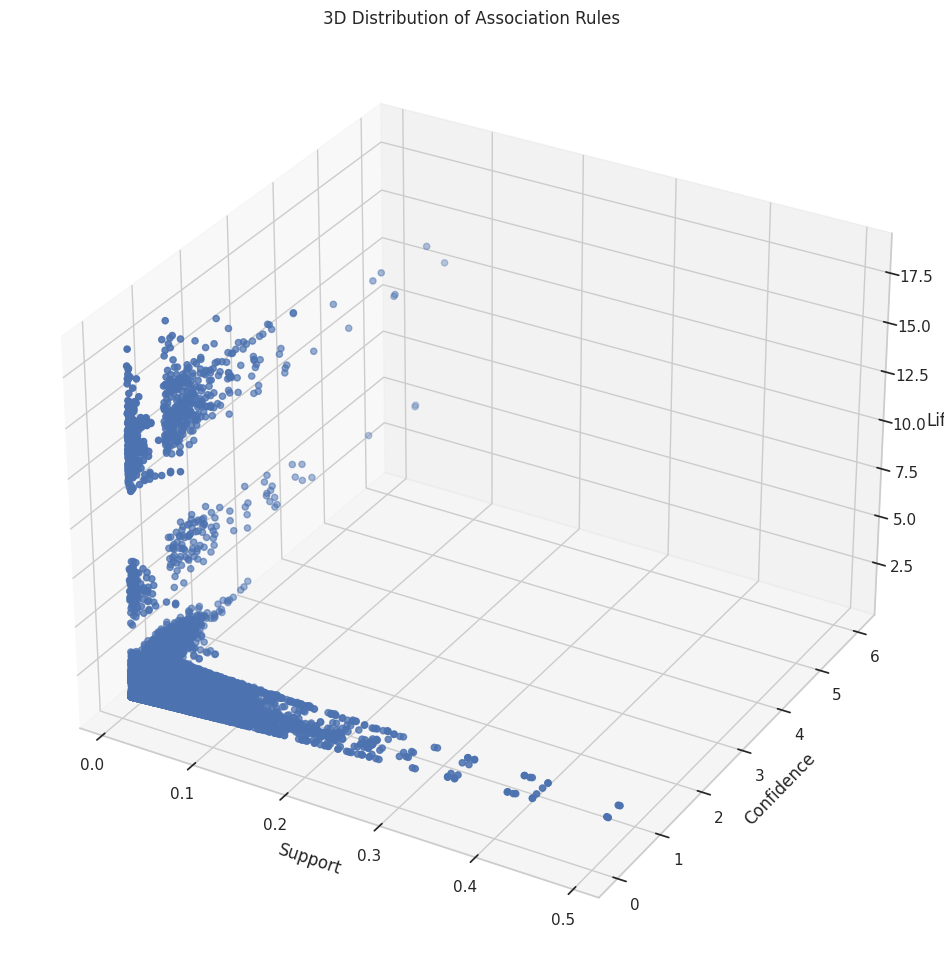

In [52]:

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

the best rules are those who are on the top right

In [53]:
import plotly.express as px
fig = px.scatter_3d(rules, x='support', y='confidence', z='confidence', size='confidence', color='lift', opacity=0.7,
                    labels={'support': 'Support', 'confidence': 'Confidence', 'lift': 'Lift'},
                    title="3D Distribution of Association Rules")

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



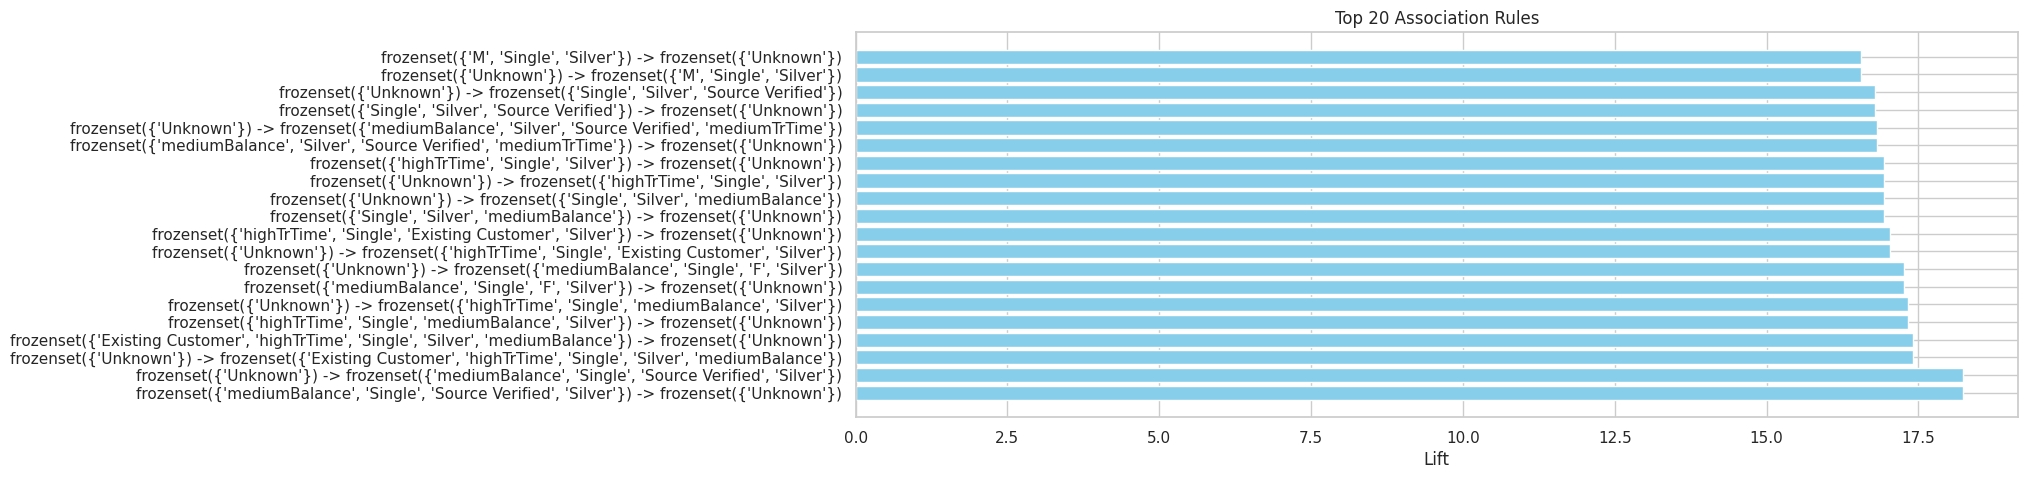

In [54]:
import matplotlib.pyplot as plt

def visualize_rules(rules, rules_to_show=20, metric='lift'):
    # Sort rules by the selected metric
    rules = rules.sort_values(by=metric, ascending=False).head(rules_to_show)

    # Convert frozensets to strings for visualization
    rules['antecedents_str'] = rules['antecedents'].astype(str)
    rules['consequents_str'] = rules['consequents'].astype(str)

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.barh(range(rules.shape[0]), rules[metric], align='center', color='skyblue')
    plt.yticks(range(rules.shape[0]), [f"{antecedent} -> {consequent}" for antecedent, consequent in zip(rules['antecedents_str'], rules['consequents_str'])])
    plt.xlabel(metric.capitalize())
    plt.title(f'Top {rules_to_show} Association Rules')
    plt.show()

# Assuming 'rules' is the DataFrame containing association rules
# You can customize the number of rules to show and the metric to consider
visualize_rules(rules, rules_to_show=20, metric='lift')

Lift = 1: independent.

Lift > 1: positive correlation. The higher the lift, the stronger the correlation. This suggests that antecedents and consequents occur together more frequently than expected by chance.

Lift < 1: Indicates a negative correlation. The lower the lift, the less strong the correlation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



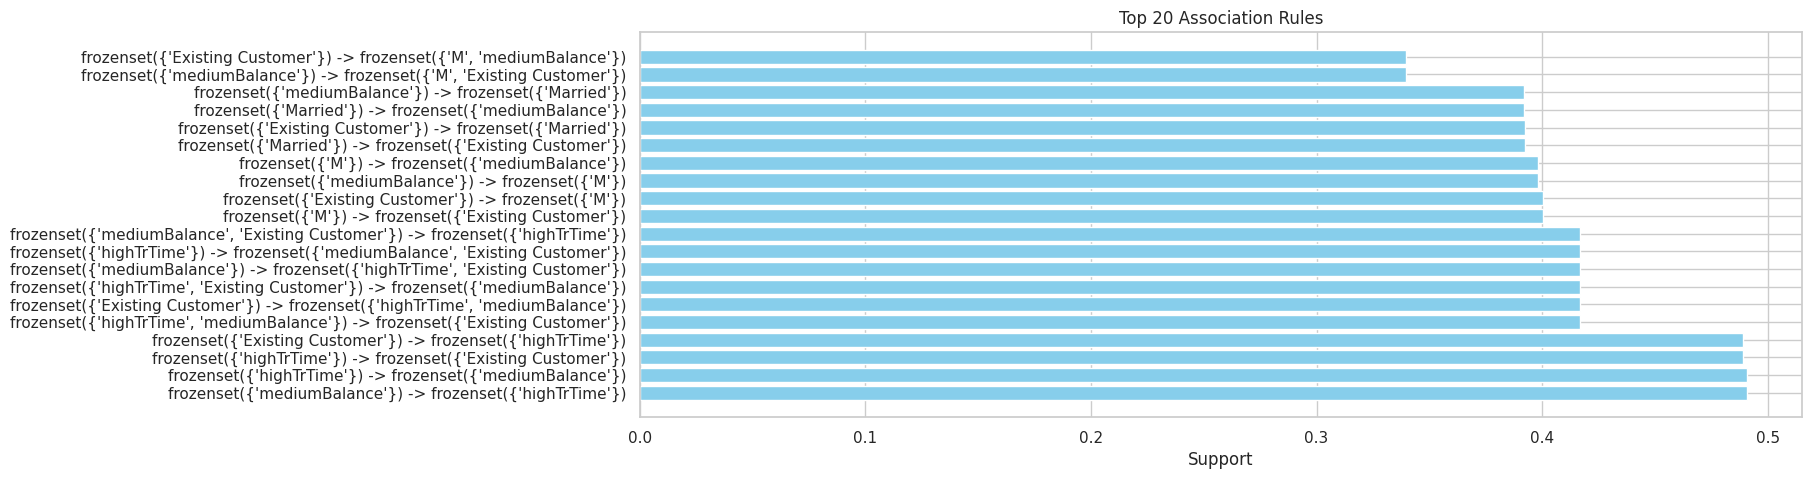

In [55]:
import matplotlib.pyplot as plt

def visualize_rules(rules, rules_to_show=20, metric='support'):
    # Sort rules by the selected metric
    rules = rules.sort_values(by=metric, ascending=False).head(rules_to_show)

    # Convert frozensets to strings for visualization
    rules['antecedents_str'] = rules['antecedents'].astype(str)
    rules['consequents_str'] = rules['consequents'].astype(str)

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.barh(range(rules.shape[0]), rules[metric], align='center', color='skyblue')
    plt.yticks(range(rules.shape[0]), [f"{antecedent} -> {consequent}" for antecedent, consequent in zip(rules['antecedents_str'], rules['consequents_str'])])
    plt.xlabel(metric.capitalize())
    plt.title(f'Top {rules_to_show} Association Rules')
    plt.show()

# Assuming 'rules' is the DataFrame containing association rules
# You can customize the number of rules to show and the metric to consider
visualize_rules(rules, rules_to_show=20, metric='support')

The higher the support, the more likely the prediction will occur.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:27: DeprecationWarning:

invalid escape sequence '\d'

<>:27: DeprecationWarning:

invalid escape sequence '\d'

<ipython-input-56-a4cb21403547>:27: DeprecationWarning:

invalid escape sequence '\d'



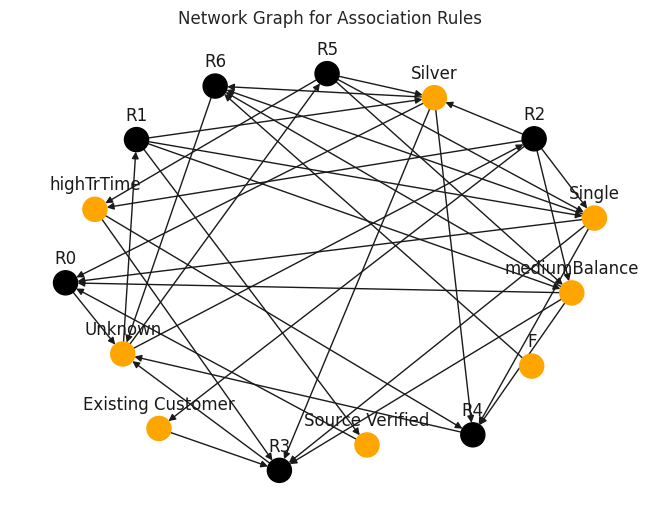

In [56]:
import networkx as nx
import re
def draw_network(rules, rules_to_show):

    # Directional Graph from Networkx
    network = nx.DiGraph()

    # Loop through number of rules to show
    for i in range(rules_to_show):
        # Add a Rule Node
        network.add_nodes_from(["R" + str(i)])
        for antecedents in rules.iloc[i]['antecedents']:
            # Add antecedent node and link to rule
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R" + str(i), weight = 2)

        for consequents in rules.iloc[i]['consequents']:
            # Add consequent node and link to rule
            network.add_nodes_from([consequents])
            network.add_edge("R" + str(i), consequents, weight = 2)

    color_map = []

    # For every node, if it's a rule, color as Black, otherwise Orange

    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node)!=None:
            color_map.append('black')
        else:
            color_map.append('orange')

    # Position nodes using spring layout
    pos = nx.spring_layout(network, k=16, scale=1)

    # Draw the network graph
    nx.draw(network, pos, node_color = color_map, font_size = 8)

    # Shift the test position upwards
    for p in pos:
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)
    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(rules, 7)

we can observe that rules R1 ,R3 are the most central. This means that these rules are associated with a greater number of other rules. Rule R4 is also central, but less so than R1 ,R3

We can also observe that rules R1 and R3 are strongly linked to each other. This means that these rules are more likely to occur together.

Finally, we can observe that rule R4 and R5 are the furthest from the other rules. This means that these rules are less likely to occur together with the other rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



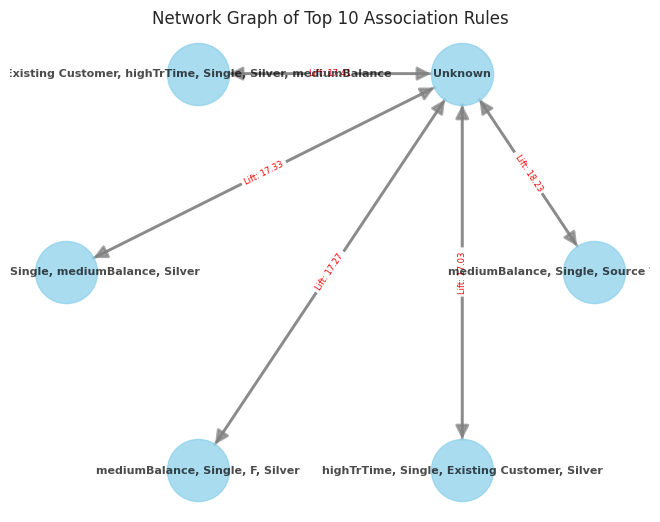

In [57]:
def visualize_rules_network(rules, rules_to_show=10, metric='lift'):
    # Sort rules by the selected metric
    rules = rules.sort_values(by=metric, ascending=False).head(rules_to_show)

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges for each rule
    for i in range(rules_to_show):
        antecedent_str = ', '.join(map(str, rules.iloc[i]['antecedents']))
        consequent_str = ', '.join(map(str, rules.iloc[i]['consequents']))
        G.add_edge(antecedent_str, consequent_str, weight=rules.iloc[i][metric])

    # Draw the network graph
    pos = nx.circular_layout(G)  # Use circular layout for better visibility
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=2000, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', width=2, alpha=0.7, arrowsize=20)

    # Display edge weights
    edge_labels = {(antecedent_str, consequent_str): f"{metric.capitalize()}: {weight:.2f}" for (antecedent_str, consequent_str, weight) in G.edges(data='weight')}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

    plt.title(f'Network Graph of Top {rules_to_show} Association Rules')
    plt.show()

# Assuming 'rules' is the DataFrame containing association rules
# You can customize the number of rules to show and the metric to consider
visualize_rules_network(rules, rules_to_show=10, metric='lift')

In [58]:
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
import plotly.express as px

def visualize_rules_sunburst(rules, rules_to_show=10, metric='lift'):
    # Sort rules by the selected metric
    rules = rules.sort_values(by=metric, ascending=False).head(rules_to_show)

    # Convert frozensets to strings for visualization
    rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x)))
    rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(map(str, x)))

    # Create a hierarchy for the sunburst chart
    hierarchy_data = []
    for i in range(rules_to_show):
        hierarchy_data.append({'Rule': f"Rule {i+1}", 'Antecedent': f"Antecedent: {rules.iloc[i]['antecedents_str']}", 'Consequent': f"Consequent: {rules.iloc[i]['consequents_str']}", metric.capitalize(): rules.iloc[i][metric]})

    # Create sunburst chart
    fig = px.sunburst(hierarchy_data, path=['Rule', 'Antecedent', 'Consequent'], values=metric.capitalize(),
                      title=f'Top {rules_to_show} Association Rules - {metric.capitalize()}',
                      width=800, height=800)

    # Show the interactive chart
    fig.show()

# Assuming 'rules' is the DataFrame containing association rules
# You can customize the number of rules to show and the metric to consider
visualize_rules_sunburst(rules, rules_to_show=12, metric='lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




The most important rules are those with the largest slices. These rules are also the most strongly linked to each other.
is this modele the top 12 are similar so we couldn't define the best rules